In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [3]:
dataset=pd.read_csv("Geneva Ionomics_X_Spec_as_int.csv")

In [4]:
dataset[0:26]

,IVNO,genus_species,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,...,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
0,318684,1,94.737452,196.644672,1776.847433,14.015541,6214.957396,1.986070e+03,18823.60057,5107.996944,...,191.923742,0.081735,0.811444,33.255243,95.859746,0.005128,16.256776,5.981147,0.278855,0.024450
1,588141,1,23.352362,131.009202,1166.801218,15.981347,5660.589666,1.305738e+03,15284.87070,3971.658387,...,101.724123,0.048140,0.343131,33.814473,69.386864,0.017477,7.492277,3.537671,0.156314,0.060345
2,588646,1,137.680886,111.022071,1976.897836,26.302390,7208.531961,2.512637e+03,20787.04128,5653.053084,...,146.973893,0.063966,0.277827,58.400894,83.124578,0.004849,7.214685,3.383637,0.297982,0.017739
3,588448,1,18.207032,58.447077,1469.811734,24.007341,5342.222323,2.400684e+03,16094.43910,3800.777526,...,218.874289,0.099867,0.416359,55.600415,120.534218,0.010221,11.923196,1.183187,0.171235,0.038915
4,1583,1,58.775194,119.388231,1349.136877,67.323999,5412.124249,2.412666e+03,17162.72458,2307.560196,...,357.633934,0.169915,0.658896,68.828553,153.686687,0.060230,7.493530,1.004368,0.194630,0.021889
5,588459,1,41.102828,87.445535,1684.590025,29.690969,4674.481989,2.198630e+03,19260.62195,5096.823405,...,204.671720,0.153866,0.670246,45.526701,149.053153,0.015216,14.574310,2.601915,0.280342,0.046425
6,588378,1,68.409526,97.876906,1114.879546,15.962495,4428.264042,1.983040e+03,17219.19337,3426.533558,...,245.652197,0.106725,0.299654,21.949714,110.165596,0.011381,7.764358,1.931030,0.179861,0.015593
7,588144,1,48.988139,98.814555,1255.779925,11.611556,5575.285430,1.918964e+03,19951.35809,4945.154980,...,97.001047,0.043707,0.491032,28.116646,85.471754,0.015618,11.258202,2.572242,0.211537,0.047607
8,588393,1,29.563568,182.133207,1133.191384,18.656845,5008.453549,2.518870e+03,17381.53539,6224.334293,...,293.226178,0.111532,0.309928,26.783561,66.417347,0.017571,10.627777,7.035986,0.320263,0.013744
9,588325,1,120.401908,134.214075,1106.274306,13.746467,4915.789867,1.919395e+03,18315.57225,3275.774958,...,83.612723,0.047619,0.237915,20.325363,64.023216,0.011927,8.023974,2.299023,0.184270,0.007752


In [5]:
dataset.drop([24,], inplace = True) 

In [6]:
dataset[0:26]

,IVNO,genus_species,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,...,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
0,318684,1,94.737452,196.644672,1776.847433,14.015541,6214.957396,1986.070463,18823.60057,5107.996944,...,191.923742,0.081735,0.811444,33.255243,95.859746,0.005128,16.256776,5.981147,0.278855,0.024450
1,588141,1,23.352362,131.009202,1166.801218,15.981347,5660.589666,1305.737926,15284.87070,3971.658387,...,101.724123,0.048140,0.343131,33.814473,69.386864,0.017477,7.492277,3.537671,0.156314,0.060345
2,588646,1,137.680886,111.022071,1976.897836,26.302390,7208.531961,2512.636791,20787.04128,5653.053084,...,146.973893,0.063966,0.277827,58.400894,83.124578,0.004849,7.214685,3.383637,0.297982,0.017739
3,588448,1,18.207032,58.447077,1469.811734,24.007341,5342.222323,2400.683753,16094.43910,3800.777526,...,218.874289,0.099867,0.416359,55.600415,120.534218,0.010221,11.923196,1.183187,0.171235,0.038915
4,1583,1,58.775194,119.388231,1349.136877,67.323999,5412.124249,2412.665543,17162.72458,2307.560196,...,357.633934,0.169915,0.658896,68.828553,153.686687,0.060230,7.493530,1.004368,0.194630,0.021889
5,588459,1,41.102828,87.445535,1684.590025,29.690969,4674.481989,2198.630234,19260.62195,5096.823405,...,204.671720,0.153866,0.670246,45.526701,149.053153,0.015216,14.574310,2.601915,0.280342,0.046425
6,588378,1,68.409526,97.876906,1114.879546,15.962495,4428.264042,1983.040054,17219.19337,3426.533558,...,245.652197,0.106725,0.299654,21.949714,110.165596,0.011381,7.764358,1.931030,0.179861,0.015593
7,588144,1,48.988139,98.814555,1255.779925,11.611556,5575.285430,1918.963830,19951.35809,4945.154980,...,97.001047,0.043707,0.491032,28.116646,85.471754,0.015618,11.258202,2.572242,0.211537,0.047607
8,588393,1,29.563568,182.133207,1133.191384,18.656845,5008.453549,2518.870236,17381.53539,6224.334293,...,293.226178,0.111532,0.309928,26.783561,66.417347,0.017571,10.627777,7.035986,0.320263,0.013744
9,588325,1,120.401908,134.214075,1106.274306,13.746467,4915.789867,1919.394950,18315.57225,3275.774958,...,83.612723,0.047619,0.237915,20.325363,64.023216,0.011927,8.023974,2.299023,0.184270,0.007752


In [7]:
dataset= dataset.iloc[:, 1:]

In [8]:
dataset[0:26]

,genus_species,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,Fe54,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
0,1,94.737452,196.644672,1776.847433,14.015541,6214.957396,1986.070463,18823.60057,5107.996944,45.755582,191.923742,0.081735,0.811444,33.255243,95.859746,0.005128,16.256776,5.981147,0.278855,0.024450
1,1,23.352362,131.009202,1166.801218,15.981347,5660.589666,1305.737926,15284.87070,3971.658387,40.226177,101.724123,0.048140,0.343131,33.814473,69.386864,0.017477,7.492277,3.537671,0.156314,0.060345
2,1,137.680886,111.022071,1976.897836,26.302390,7208.531961,2512.636791,20787.04128,5653.053084,65.567369,146.973893,0.063966,0.277827,58.400894,83.124578,0.004849,7.214685,3.383637,0.297982,0.017739
3,1,18.207032,58.447077,1469.811734,24.007341,5342.222323,2400.683753,16094.43910,3800.777526,60.854345,218.874289,0.099867,0.416359,55.600415,120.534218,0.010221,11.923196,1.183187,0.171235,0.038915
4,1,58.775194,119.388231,1349.136877,67.323999,5412.124249,2412.665543,17162.72458,2307.560196,91.539069,357.633934,0.169915,0.658896,68.828553,153.686687,0.060230,7.493530,1.004368,0.194630,0.021889
5,1,41.102828,87.445535,1684.590025,29.690969,4674.481989,2198.630234,19260.62195,5096.823405,48.432950,204.671720,0.153866,0.670246,45.526701,149.053153,0.015216,14.574310,2.601915,0.280342,0.046425
6,1,68.409526,97.876906,1114.879546,15.962495,4428.264042,1983.040054,17219.19337,3426.533558,29.815948,245.652197,0.106725,0.299654,21.949714,110.165596,0.011381,7.764358,1.931030,0.179861,0.015593
7,1,48.988139,98.814555,1255.779925,11.611556,5575.285430,1918.963830,19951.35809,4945.154980,25.852661,97.001047,0.043707,0.491032,28.116646,85.471754,0.015618,11.258202,2.572242,0.211537,0.047607
8,1,29.563568,182.133207,1133.191384,18.656845,5008.453549,2518.870236,17381.53539,6224.334293,45.669050,293.226178,0.111532,0.309928,26.783561,66.417347,0.017571,10.627777,7.035986,0.320263,0.013744
9,1,120.401908,134.214075,1106.274306,13.746467,4915.789867,1919.394950,18315.57225,3275.774958,30.149158,83.612723,0.047619,0.237915,20.325363,64.023216,0.011927,8.023974,2.299023,0.184270,0.007752


In [10]:
genotype = pd.get_dummies(dataset, drop_first = True)

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.isnull().sum().sum()

0

In [13]:
new_dataset = pd.concat([genotype, dataset], axis = 1)

In [14]:
X= new_dataset.iloc[:, :].values

In [15]:
sc= StandardScaler()
X= sc.fit_transform(X)


In [16]:
wss=[]
for i in range (1,11):
    kmeanscluster = KMeans(n_clusters = i, init = 'k-means++')
    kmeanscluster.fit(X)
    kmeanscluster.inertia_
    wss.append(kmeanscluster.inertia_)
    

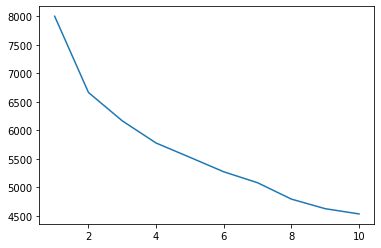

In [17]:
plt.plot(range(1,11), wss)

In [18]:
kmeanscluster = KMeans(n_clusters= 5, init = 'k-means++')
kmeanscluster.fit(X)
Y_pred = kmeanscluster.predict(X)

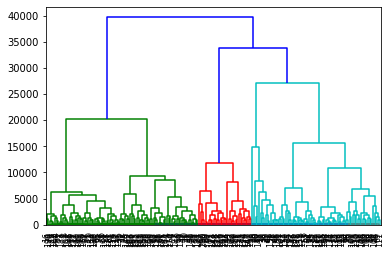

In [51]:
dendogram = sch.dendrogram(sch.linkage(X, method= 'ward', metric = 'euclidean'))
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dataset, 'ward')
h =hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=dataset.index)
plt.savefig("dendogram X")

In [26]:

cluster= AgglomerativeClustering(n_clusters  = 5)

In [27]:
cluster.fit(X)
Y_pred_dendrogram = cluster.fit_predict(X)

In [50]:
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>